In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('DS1_C4_S5_Car_Data_Challenge.xlsx')

## Task1:

In [3]:
T1=df[['Make','City_Mileage_km_litre']]
T1_1=T1.groupby('Make')['City_Mileage_km_litre'].max().sort_values(ascending=False).head(10)
a=pd.DataFrame(T1_1)
a

,City_Mileage_km_litre
Make,
Mahindra,110.00
Maruti Suzuki,28.40
Honda,25.50
Renault,25.17
Tata,24.12
Hyundai,24.00
Datsun,21.38
Jaguar,21.27
Fiat,21.20


<BarContainer object of 10 artists>

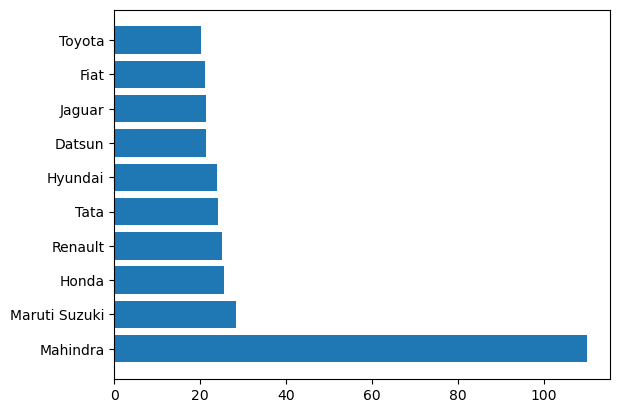

In [4]:
plt.barh(a.index,a['City_Mileage_km_litre'])

#### Mahindra is the outlier in above chart because it has extremely high mileage as compared to other manufacturers. 
#### We can resolve this problem by taking out mahindra out of chart.

## Task2:

In [5]:
T2=df.loc[(df['Fuel_Type']!='Electric'),['Make','City_Mileage_km_litre']]
a=T2.groupby(by='Make')['City_Mileage_km_litre'].max().sort_values(ascending=False).head(20)
a=pd.DataFrame(a)
a

,City_Mileage_km_litre
Make,
Maruti Suzuki,28.40
Honda,25.50
Renault,25.17
Tata,24.12
Hyundai,24.00
Mahindra,22.25
Datsun,21.38
Jaguar,21.27
Fiat,21.20


<BarContainer object of 20 artists>

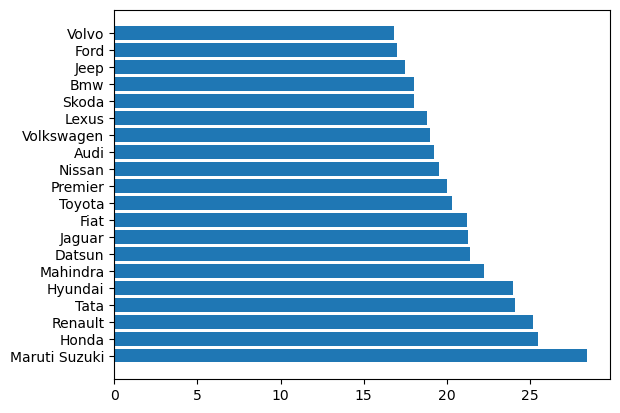

In [6]:
plt.barh(a.index,a['City_Mileage_km_litre'])

## Task3:

In [7]:
T3=pd.DataFrame(df[['Body_Type']].groupby(by='Body_Type')['Body_Type'].count().sort_values(ascending=False).head(5))
T3

,Body_Type
Body_Type,
SUV,447
Sedan,333
Hatchback,316
Coupe,41
MPV,39


<BarContainer object of 5 artists>

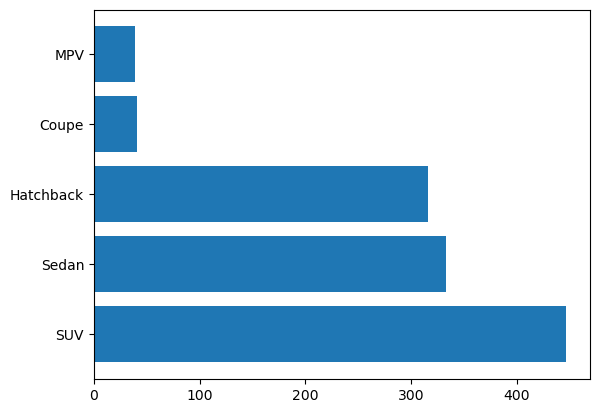

In [8]:
plt.barh(T3.index,T3['Body_Type'])

## Task4:

In [9]:
T4=df.loc[(df['Make'].isin(['Hyundai','Mahindra','Renault','Skoda'])),['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']]
T4

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
12,Renault,25.17,NaN
13,Renault,25.17,NaN
14,Renault,25.17,NaN
15,Renault,25.17,NaN
16,Renault,25.17,NaN
...,...,...,...
1249,Skoda,NaN,NaN
1250,Skoda,NaN,NaN
1255,Mahindra,18.00,20.08
1256,Mahindra,18.00,20.08


In [10]:
pd.pivot_table(data=T4,index='Make',values='City_Mileage_km_litre',aggfunc='mean')

,City_Mileage_km_litre
Make,
Hyundai,16.679853
Mahindra,20.003763
Renault,20.554286
Skoda,13.953333


In [11]:
pd.pivot_table(data=T4,index='Make',values='City_Mileage_km_litre',aggfunc='median')

,City_Mileage_km_litre
Make,
Hyundai,16.38
Mahindra,16.00
Renault,21.04
Skoda,14.50


In [12]:
pd.pivot_table(data=T4,index='Make',values='Highway_Mileage_km_litre',aggfunc='mean')

,Highway_Mileage_km_litre
Make,
Hyundai,18.294146
Mahindra,18.140175
Renault,17.690000
Skoda,17.268529


In [13]:
pd.pivot_table(data=T4,index='Make',values='Highway_Mileage_km_litre',aggfunc='median')

,Highway_Mileage_km_litre
Make,
Hyundai,18.50
Mahindra,17.21
Renault,19.60
Skoda,16.00


## Task5:

In [14]:
T5=T4.groupby(by='Make')['City_Mileage_km_litre'].agg(['mean','median'])
T5

,mean,median
Make,,
Hyundai,16.679853,16.38
Mahindra,20.003763,16.00
Renault,20.554286,21.04
Skoda,13.953333,14.50


<AxesSubplot:xlabel='Make'>

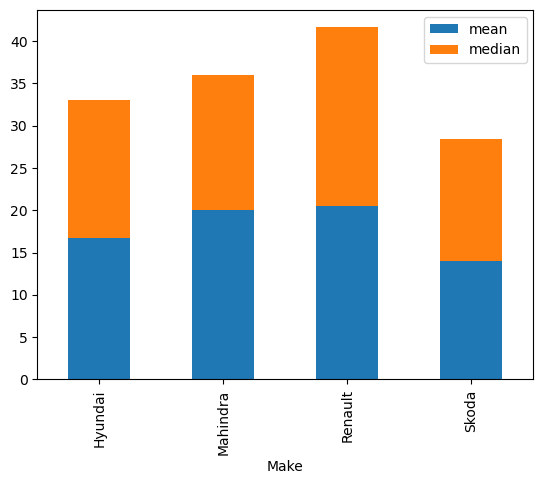

In [15]:
T5.plot(kind='bar',stacked=True)

## Task6:

In [16]:
city_mean=df['City_Mileage_km_litre'].mean()
df['City_Mileage_km_litre'].fillna(city_mean,inplace=True)

In [17]:
highway_mean=df['Highway_Mileage_km_litre'].mean()
df['Highway_Mileage_km_litre'].fillna(highway_mean,inplace=True)

In [18]:
T6_city=pd.DataFrame(df.groupby(by='Make')['City_Mileage_km_litre'].mean().sort_values())
T6_highway=pd.DataFrame(df.groupby(by='Make')['Highway_Mileage_km_litre'].mean().sort_values())

<BarContainer object of 39 artists>

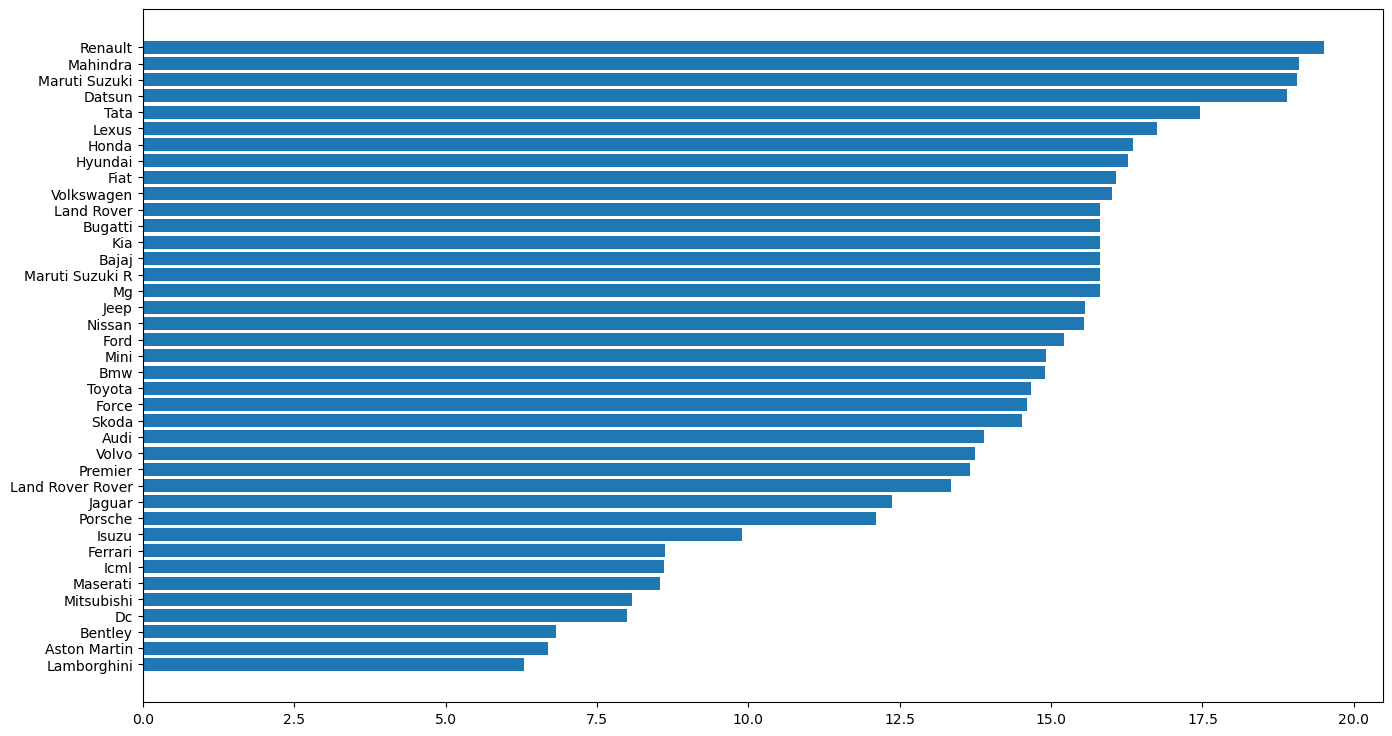

In [19]:
fig,ax=plt.subplots(figsize=(16,9))
ax.barh(T6_city.index,T6_city['City_Mileage_km_litre'])

<BarContainer object of 39 artists>

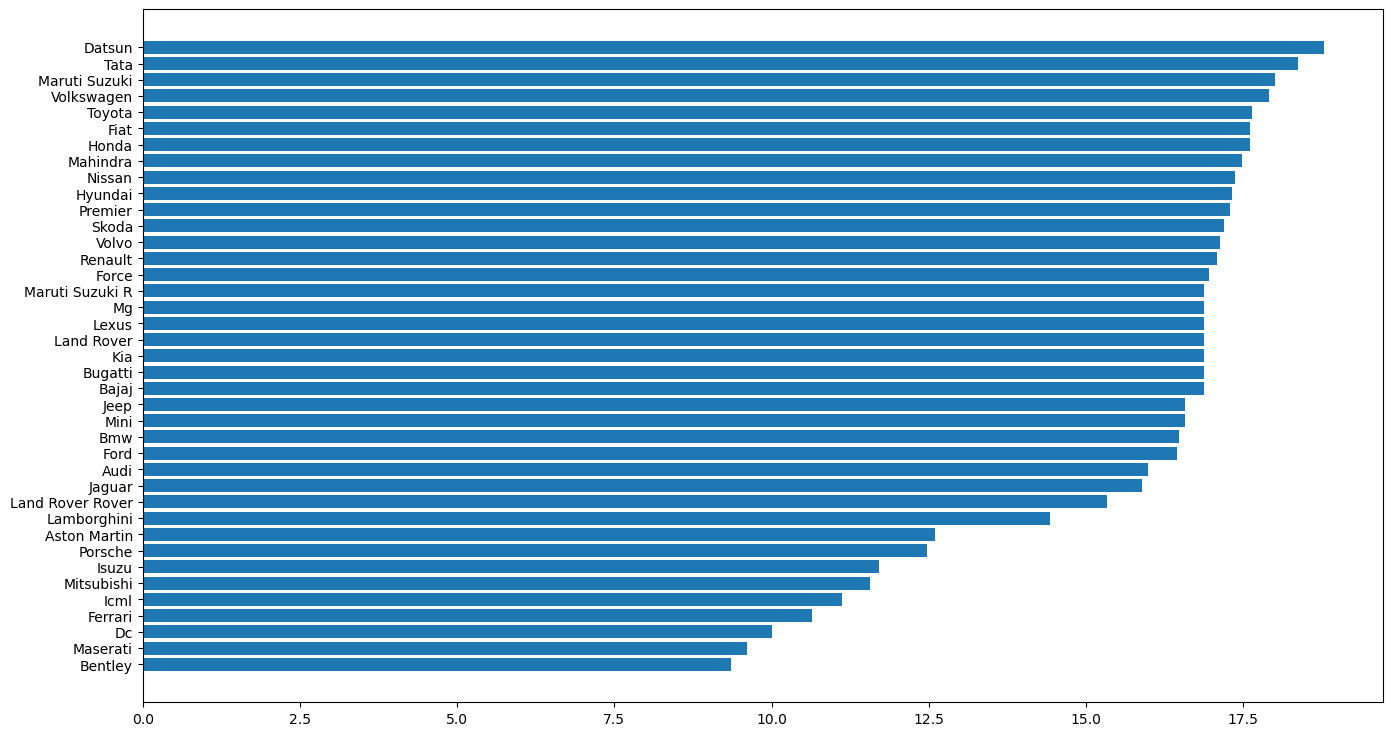

In [20]:
fig,ax=plt.subplots(figsize=(16,9))
ax.barh(T6_highway.index,T6_highway['Highway_Mileage_km_litre'])

## Task7:

In [77]:
T7=df.sort_values(by='City_Mileage_km_litre',ascending=False).head(12)
a=T7[['City_Mileage_km_litre','Displacement']].dropna()
a

,City_Mileage_km_litre,Displacement
687,110.0,72.0
688,110.0,72.0
689,110.0,72.0
155,28.4,1248.0
165,28.4,1248.0
164,28.4,1248.0
160,28.4,1248.0
159,28.4,1248.0
157,28.4,1248.0
166,28.4,1248.0


<AxesSubplot:xlabel='Displacement'>

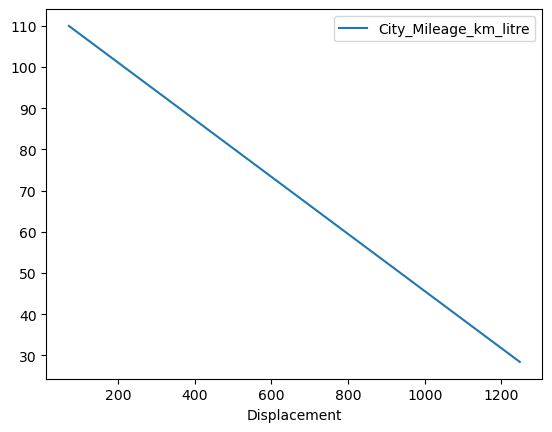

In [78]:
a.plot(kind='line',y='City_Mileage_km_litre',x='Displacement')

#### In Task 7 there were few null values so we were not able to display line chart for that. So i had to remove those null values rows. after plotting line chart we see that - more displacement means less mileage. And less displacement means more mileage.

## Task8:

In [124]:
T8=df[(df['Hill_Assist']=='Yes')&(df['Child_Safety_Locks']=='Yes')&(df['High_Speed_Alert_System']=='Yes')&(df['Fasten_Seat_Belt_Warning']=='Yes')]
a=T8.groupby(by='Make')['City_Mileage_km_litre'].max().sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='Make'>

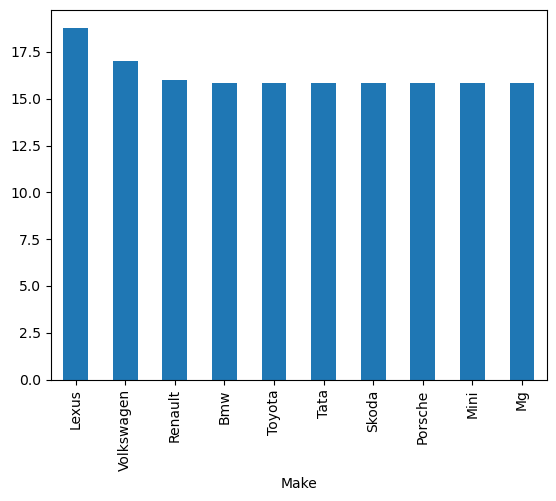

In [128]:
a.plot(kind='bar')

## Task9:

In [139]:
T9=df[df['Drive_Modes']=='Normal, Comfort, Eco, Sport, Power Mode']
T9

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
321,321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,"Roller cam follower, continuous intake and exh...",Yes,Yes,NaN,Yes,Yes,NaN,NaN
330,330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


#### Only 2 cars have such features

## Task10:

In [159]:
T10_hyundai=df[df['Make']=='Hyundai'][['Model','City_Mileage_km_litre']]
T10_suzuki=df[df['Make']=='Maruti Suzuki'][['Model','City_Mileage_km_litre']]
T10_tata=df[df['Make']=='Tata'][['Model','City_Mileage_km_litre']]
T10_bmw=df[df['Make']=='Bmw'][['Model','City_Mileage_km_litre']]

<AxesSubplot:ylabel='Frequency'>

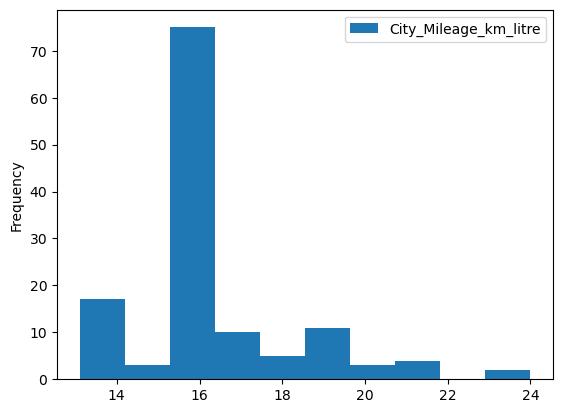

In [161]:
T10_hyundai.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

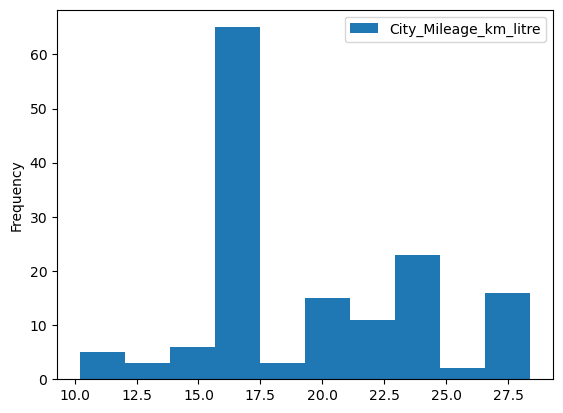

In [166]:
T10_suzuki.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

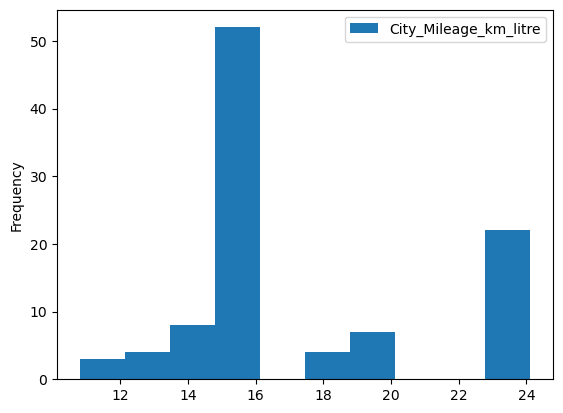

In [167]:
T10_tata.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

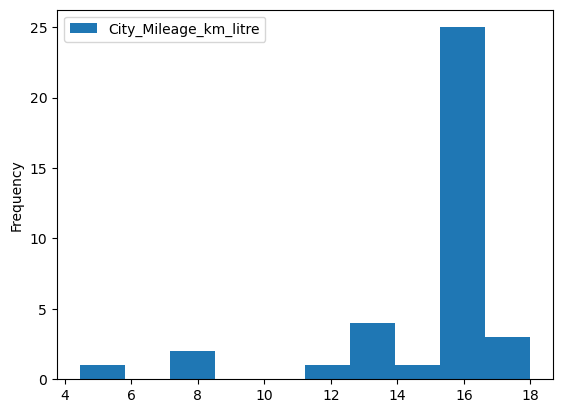

In [168]:
T10_bmw.plot(kind='hist')

#### Suzuki have the most Skewed data